In [8]:
import numpy as np

continous_state = np.array([0.02727336, -0.20172954,  0.03625453,  0.32351476])
discrete_state = np.round(continous_state, 2)

print(continous_state, discrete_state)

[ 0.02727336 -0.20172954  0.03625453  0.32351476] [ 0.03 -0.2   0.04  0.32]


In [13]:
import numpy as np

d = dict()

arr = np.random.rand(5)
d[(0, 0)] = arr

arr = np.random.rand(5)
d[(0, 1)] = arr

print(d[(0, 0)])
print(np.argmax(d[(0, 0)]))

print(d[(0, 1)])
print(np.argmax(d[(0, 1)]))

print((0, 1) in d)
print((3, 1) in d)

[0.86306784 0.63408758 0.84507552 0.06573421 0.13607346]
0
[0.46538251 0.127159   0.89975383 0.40907093 0.06270277]
2
True
False


In [32]:
%load_ext autoreload
%autoreload 2

import gymnasium as gym
import numpy as np
from q_agent import QAgent 

env = gym.make("CartPole-v1", render_mode="human")
# print(env.observation_space.dtype)
# print(env.action_space.n)

agent = QAgent(env)

state1 = (np.random.rand(), np.random.rand(), np.random.rand())
state2 = (np.random.rand(), np.random.rand(), np.random.rand())

print(agent.get_q_values(state1))
print(agent.get_q_values(state2))

print(agent.get_best_action(state1))
print(agent.get_best_action(state2))
print(agent.q_table)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The number of discreet action is 2
[0.57653218 0.20112496]
[0.87250812 0.17254978]
0
0
{(0.19, 0.32, 0.33): array([0.57653218, 0.20112496]), (0.44, 0.53, 0.66): array([0.87250812, 0.17254978])}


In [ ]:
%load_ext autoreload
%autoreload 2

import numpy as np
import gymnasium as gym
from q_agent import QAgent 

env = gym.make("CartPole-v1", render_mode="human") 
agent = QAgent(env)  

# Sample state from the environment
state_1 = env.observation_space.sample()
print("Sample state:", state_1)

# Fake a reward and next state
reward = 1.0  # Reward for taking an action in state_1
next_state = env.observation_space.sample()  # Sample a new state

# Let's assume the agent took action 0
action = 0

initial_state_action_value = agent.get_state_action_values(state_1)[action]
print("Initial state_action_value:", initial_state_action_value)

expected_target_value = reward + agent.discount_factor * (agent.get_state_value(next_state))
print("Expected_target_value:", expected_target_value)
expected_state_action_value = initial_state_action_value + agent.learning_rate * (expected_target_value - initial_state_action_value)
print("Expected state_action_value:", expected_state_action_value)

print("--------------------------------------")

# Update the Q-table
agent.update_q_table(state_1, action, reward, next_state, done=False)

# Check updated Q-values
updated_q_values = agent.get_state_action_values(state_1)
print("Updated state_action_value:", updated_q_values[action])


In [34]:
%load_ext autoreload
%autoreload 2

import numpy as np
import gymnasium as gym
from q_agent import QAgent 

env = gym.make("CartPole-v1", render_mode="human") 
agent = QAgent(env)  

# Sample state from the environment
state_1 = env.observation_space.sample()
print("Sample state:", state_1)

# Fake a reward and next state
reward = 1.0  # Reward for taking an action in state_1
next_state = env.observation_space.sample()  # Sample a new state

# Let's assume the agent took action 0
action = 0

initial_state_action_value = agent.get_state_action_values(state_1)[action]
print("Initial state_action_value:", initial_state_action_value)

expected_target_value = reward
print("Expected_target_value:", expected_target_value)
expected_state_action_value = initial_state_action_value + agent.learning_rate * (expected_target_value - initial_state_action_value)
print("Expected state_action_value:", expected_state_action_value)

print("--------------------------------------")

# Update the Q-table
agent.update_q_table(state_1, action, reward, next_state, done=True)

# Check updated Q-values
updated_q_values = agent.get_state_action_values(state_1)
print("Updated state_action_value:", updated_q_values[action])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The number of discreet action is 2
Sample state: [ 8.8964361e-01 -3.4026292e+38 -1.2188279e-01 -1.0107746e+38]
Initial state_action_value: 0.9097397532815523
Expected_target_value: 1.0
Expected state_action_value: 0.9106423557487368
--------------------------------------
Updated state_action_value: 0.9106423557487368


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Episode: 0, Total Reward: 15.0 Epsilon:  0.89991
Episode: 10, Total Reward: 20.0 Epsilon:  0.89901049485153
Episode: 20, Total Reward: 17.0 Epsilon:  0.8981118888035389
Episode: 30, Total Reward: 12.0 Epsilon:  0.8972141809573309
Episode: 40, Total Reward: 22.0 Epsilon:  0.8963173704151082
Episode: 50, Total Reward: 14.0 Epsilon:  0.8954214562799705
Episode: 60, Total Reward: 23.0 Epsilon:  0.8945264376559141
Episode: 70, Total Reward: 75.0 Epsilon:  0.8936323136478308
Episode: 80, Total Reward: 16.0 Epsilon:  0.8927390833615071
Episode: 90, Total Reward: 24.0 Epsilon:  0.8918467459036232
Training complete.
state_visit_frequencies_count =  {202: 1, 138: 1, 30: 4, 17: 3, 18: 3, 9: 6, 8: 8, 14: 3, 7: 8, 4: 30, 3: 48, 2: 85, 78: 1, 1: 241, 27: 2, 43: 1, 12: 1, 10: 3, 16: 5, 5: 22, 57: 2, 11: 5, 19: 2, 26: 1, 6: 9, 29: 1, 20: 1, 47: 1, 15: 1}


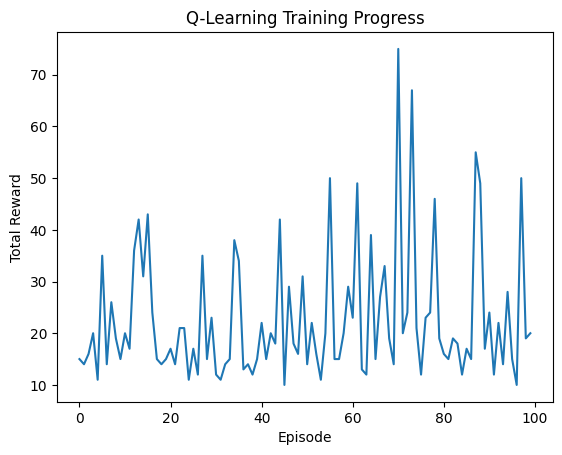

Episode reward: 28.0
Episode reward: 46.0
Episode reward: 26.0
Episode reward: 12.0
Episode reward: 34.0
Episode reward: 65.0
Episode reward: 34.0
Episode reward: 28.0


In [4]:
%load_ext autoreload
%autoreload 2

import gymnasium as gym
from q_agent import QAgent 

env = gym.make("CartPole-v1") 
agent = QAgent(env)  

state_filter = lambda state : (state[1], state[2], state[3])

agent.state_rounding = 1
agent.train(100, min_epsilon=0.5, state_filter=state_filter)  # Train the agent

# Rendering loop
env = gym.make("CartPole-v1", render_mode="human") 
agent.epsilon = 0.99
for _ in range(8):
    episode_reward = 0
    state, _ = env.reset()
    done = False

    while not done:
        env.render()  # Render the environment 
        state = state_filter(state)
        action = agent.get_best_action(state)  # Agent chooses the best action
        next_state, reward, done, truncated, info = env.step(action)   
        episode_reward += reward
        state = next_state

        if done or truncated:
            print("Episode reward:", episode_reward)

env.close()


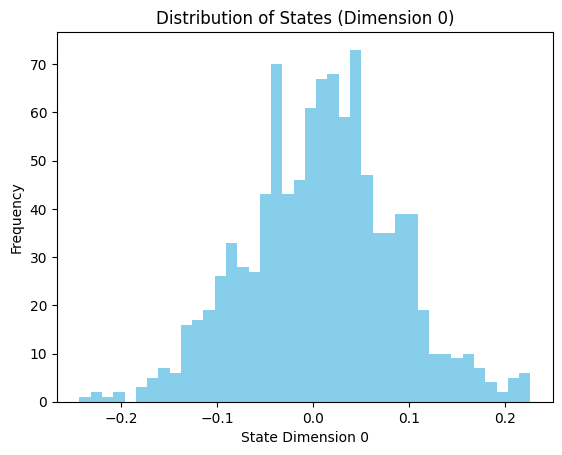

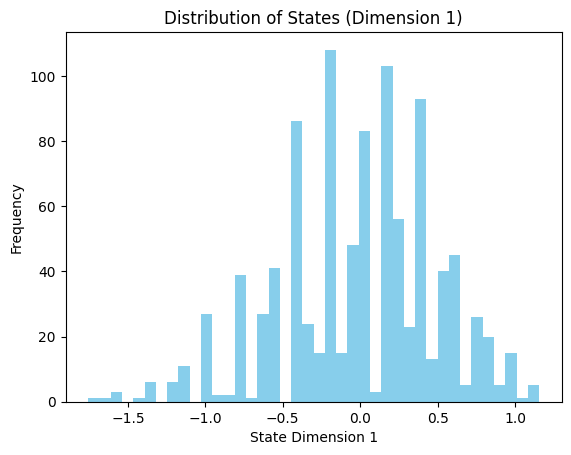

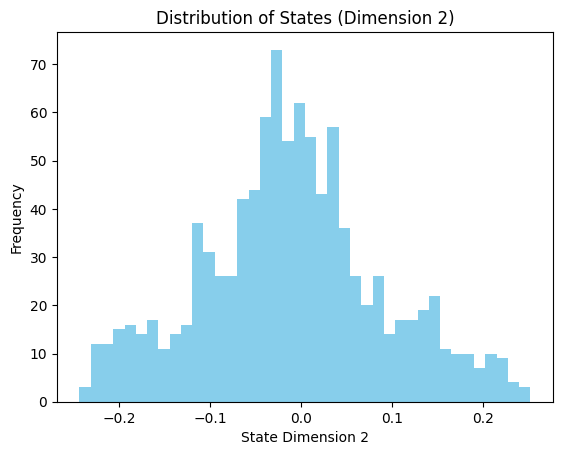

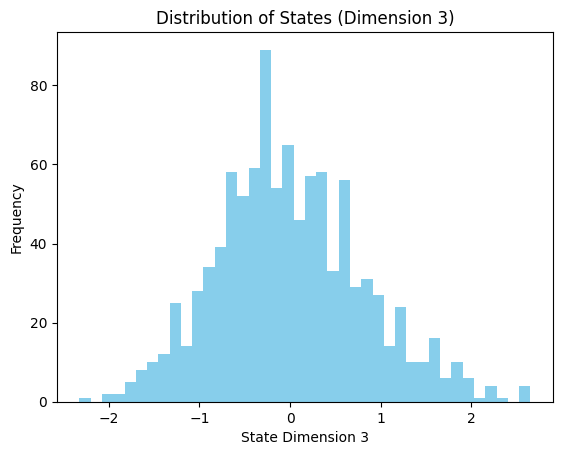

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym

env = gym.make("CartPole-v1")

def to_discreet(state):
    return np.round(state, 2)

all_observations = []  # Collect all observed states

observation, info = env.reset(seed=42)
for _ in range(1000):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    all_observations.append(observation) 

    if terminated or truncated:
        observation, info = env.reset()

env.close()

# Prepare data for plotting
all_observations = np.array(all_observations)  # Convert to NumPy array

# Visualize distributions for each dimension of the state space
for i in range(all_observations.shape[1]):
    plt.figure()  # Create a separate figure for each dimension
    plt.hist(all_observations[:, i], bins=40, color="skyblue")
    plt.xlabel(f"State Dimension {i}")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of States (Dimension {i})")
    plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym

env = gym.make("CartPole-v1")

def to_discreet(state):
    return np.round(state, 1)

def get_state_key(state):
    discretized_state = to_discreet(state)
    return "_".join(str(value) for value in discretized_state)  

state_counts = {}  # Dictionary to track state visitation counts

observation, info = env.reset(seed=42)
for _ in range(1000):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    
    state_key = get_state_key(observation)
    state_counts[state_key] = state_counts.get(state_key, 0) + 1  

    if terminated or truncated:
        observation, info = env.reset()

env.close()

print(state_counts) 

num_states_visited_twice = sum(count > 1 for count in state_counts.values())
print("Number of states visited more than once:", num_states_visited_twice)


{'0.0_0.2_0.0_-0.3': 10, '0.0_0.4_0.0_-0.5': 4, '0.0_0.6_0.0_-0.8': 4, '0.1_0.8_0.0_-1.1': 1, '0.1_1.0_-0.0_-1.4': 2, '0.1_1.2_-0.0_-1.7': 1, '0.1_1.4_-0.1_-2.0': 1, '0.1_1.6_-0.1_-2.3': 1, '0.2_1.4_-0.2_-2.1': 2, '0.2_1.2_-0.2_-1.8': 2, '0.2_1.0_-0.2_-1.6': 1, '-0.0_0.2_0.0_-0.3': 8, '-0.0_0.0_0.0_0.0': 7, '-0.0_-0.1_0.0_0.3': 1, '-0.0_-0.3_0.0_0.6': 2, '-0.0_-0.1_0.0_0.4': 1, '-0.0_-0.3_0.0_0.7': 1, '-0.1_-0.2_0.1_0.4': 6, '-0.1_-0.3_0.1_0.7': 1, '-0.1_-0.5_0.1_1.0': 1, '-0.1_-0.7_0.1_1.3': 1, '-0.1_-0.5_0.1_1.1': 1, '-0.1_-0.4_0.2_0.8': 3, '-0.1_-0.2_0.2_0.6': 3, '-0.1_-0.4_0.2_0.9': 2, '-0.1_-0.6_0.2_1.3': 4, '-0.1_-0.4_0.2_1.0': 2, '-0.0_-0.2_-0.0_0.3': 16, '-0.0_-0.0_-0.0_0.0': 3, '-0.0_0.2_-0.0_-0.3': 11, '-0.0_0.4_-0.0_-0.6': 3, '-0.0_-0.4_-0.0_0.6': 8, '-0.0_-0.6_-0.0_0.9': 3, '-0.0_-0.4_0.0_0.6': 5, '-0.1_-0.6_0.0_0.9': 3, '-0.1_-0.8_0.0_1.2': 1, '-0.1_-1.0_0.1_1.5': 6, '-0.1_-0.8_0.1_1.2': 6, '-0.1_-0.8_0.1_1.3': 7, '-0.2_-1.0_0.2_1.6': 1, '-0.2_-0.8_0.2_1.4': 2, '-0.2_-1.0_

In [29]:
import numpy as np
import random

results = []
for i in range(1000):
    results.append(random.choices([0, 1], weights=(0.7, 0.3)))

results = np.ravel(results)

# print(results)

# Get the percentage of 1s
percentage_ones = np.count_nonzero(results == 1) / len(results)

# Get the percentage of 0s
percentage_zeros = np.count_nonzero(results == 0) / len(results)

print("The number of percentage of 1s is:", percentage_ones * 100, "The number of percentage of 0s is:", percentage_zeros * 100)


The number of percentage of 1s is: 27.500000000000004 The number of percentage of 0s is: 72.5


In [48]:
import random
import numpy as np

t = ({(0, 0, 0, 1): 0.9, (0, 0, 1, 0): 0.5}, 0)

state_probs = t[0]

states = list(state_probs.keys())
print(states)

probs = state_probs.values()
print(probs)

results = []
for i in range(10):
    results.append(random.choices(states, weights=list(probs))[0])

print(results)

[(0, 0, 0, 1), (0, 0, 1, 0)]
dict_values([0.9, 0.5])
[(0, 0, 0, 1), (0, 0, 1, 0), (0, 0, 0, 1), (0, 0, 0, 1), (0, 0, 1, 0), (0, 0, 1, 0), (0, 0, 1, 0), (0, 0, 0, 1), (0, 0, 0, 1), (0, 0, 0, 1)]


In [1]:
%reload_ext autoreload
%load_ext autoreload
%autoreload 2

# Test
from collections import Counter
from test_env import TestEnv

env = TestEnv()
state = env.reset()
results = []
n = 1000
total_rewards = 0
steps = 0

for i in range(n):
    action = env.action_space.sample()
    next_state, reward, done, _, _ = env.step(action)
    results.append(next_state)
    total_rewards += reward
    steps += 1

    if done:
        # print("steps:", next_state, "total_rewards:", total_rewards)
        next_state = env.reset()

counts = Counter(results)
print(counts, "total_rewards:", total_rewards, "steps:", steps)
# states = list(trans.keys())
# probs = list(trans.values())
# for k, v in counts.items():
#     actual_prob = v / n
#     p = probs[states.index(k)]
#     print(k, actual_prob, p)
#     assert abs(actual_prob - p) < 0.05

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Counter({(0, 0, 1, 0, 0): 208, (0, 0, 0, 1, 0): 185, (1, 0, 0, 1, 0): 95, (1, 0, 1, 0, 0): 83, (0, 1, 0, 1, 0): 73, (0, 1, 1, 0, 0): 69, (0, 0, 0, 1, 1): 58, (0, 0, 0, 0, 1): 49, (0, 1, 0, 0, 1): 25, (0, 1, 0, 0, 0): 24, (0, 1, 1, 1, 0): 23, (1, 0, 0, 0, 0): 21, (0, 1, 0, 1, 1): 18, (0, 0, 1, 1, 0): 16, (1, 0, 0, 0, 1): 15, (1, 0, 0, 1, 1): 15, (0, 1, 1, 1, 1): 8, (0, 1, 1, 0, 1): 6, (0, 0, 1, 0, 1): 6, (0, 0, 1, 1, 1): 3}) total_rewards: 623 steps: 1000


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Episode: 0, Total Reward: 0 Epsilon:  0.89991
Episode: 10, Total Reward: 1 Epsilon:  0.89901049485153
Episode: 20, Total Reward: 2 Epsilon:  0.8981118888035389
Episode: 30, Total Reward: 0 Epsilon:  0.8972141809573309
Episode: 40, Total Reward: 0 Epsilon:  0.8963173704151082
Episode: 50, Total Reward: 10 Epsilon:  0.8954214562799705
Episode: 60, Total Reward: 0 Epsilon:  0.8945264376559141
Episode: 70, Total Reward: 0 Epsilon:  0.8936323136478308
Episode: 80, Total Reward: 10 Epsilon:  0.8927390833615071
Episode: 90, Total Reward: 0 Epsilon:  0.8918467459036232
Training complete.
state_visit_frequencies_count =  {100: 1, 38: 2, 10: 1, 14: 1}


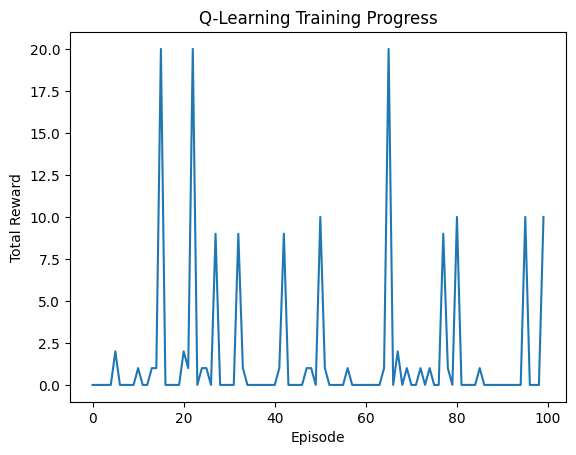

next_state: (1, 0, 1, 0, 0) reward: 1 done: True truncated: None info: None
next_state: (1, 0, 0, 1, 1) reward: 0 done: True truncated: None info: None
next_state: (1, 0, 1, 0, 0) reward: 1 done: True truncated: None info: None
next_state: (1, 0, 0, 1, 1) reward: 0 done: True truncated: None info: None
next_state: (1, 0, 0, 1, 1) reward: 0 done: True truncated: None info: None
next_state: (1, 0, 0, 0, 0) reward: 0 done: True truncated: None info: None
next_state: (1, 0, 1, 0, 0) reward: 1 done: True truncated: None info: None
next_state: (1, 0, 1, 0, 0) reward: 1 done: True truncated: None info: None
next_state: (1, 0, 0, 1, 1) reward: 0 done: True truncated: None info: None
next_state: (1, 0, 1, 0, 0) reward: 1 done: True truncated: None info: None
next_state: (1, 0, 0, 0, 0) reward: 0 done: True truncated: None info: None
next_state: (1, 0, 1, 0, 0) reward: 1 done: True truncated: None info: None
next_state: (1, 0, 1, 0, 0) reward: 1 done: True truncated: None info: None
next_state: 

In [3]:
%load_ext autoreload
%autoreload 2

import gymnasium as gym
from q_agent import QAgent 
from test_env import TestEnv
from collections import Counter

env = TestEnv()
agent = QAgent(env)  

agent.train(100)  # Train the agent

# Rendering loop
env = TestEnv()
results = []
for _ in range(100):
    state, _ = env.reset()
    done = False

    while not done:
        action = agent.get_best_action(state)  # Agent chooses the best action
        next_state, reward, done, truncated, info = env.step(action)   
        results.append(next_state)
        if done or truncated:
            print("next_state:", next_state, "reward:", reward, "done:", done, "truncated:", truncated, "info:", info)
            next_state, info = env.reset()

print(Counter(results))
print(agent.q_table)

In [4]:
%reload_ext autoreload
%load_ext autoreload
%autoreload 2

import numpy as np
from test_env import TestEnv

env = TestEnv()
state = env.reset()

print(env.calculate_q_table_state_action_values())

# print(sum({(0, 1, 1, 0, 1): 0.2, (0, 1, 1, 1, 0): 0.8}.values()))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
{(0, 0, 0, 0, 0): {0: 1.7460000000000002, 1: 1.2960000000000003}, (0, 0, 0, 0, 1): {0: 1.7, 1: 0.0}, (0, 0, 0, 1, 0): {0: 2.0, 1: 0.0}, (0, 0, 0, 1, 1): {0: 4.0, 1: 1.8}, (0, 0, 1, 0, 0): {0: 0.0, 1: 0.8}}
